In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [4]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

La librairie pandas contient des structures et des outils de manipulation de données conçus pour rendre le nettoyage et l’analyse des données rapides et faciles à effectuer en Python. pandas est souvent utilisé en tandem avec des outils de calcul numérique comme NumPy et SciPy, des librairies analytiques comme statsmodels et scikit-learn, et des librairies de visualisation de données comme matplotlib.  
pandas propose une approche dans le même style que NumPy pour le calcul basé sur les tableaux, avec en particulier des fonctions de traitement de tableaux ainsi qu’une préférence pour traiter les données sans requérir de boucles de répétition for. Si pandas adopte de nombreux idiomes de codage de NumPy, la plus grande différence est que pandas est conçue pour travailler avec des données tabulaires ou hétérogènes. NumPy, en revanche, est plus adaptée pour travailler avec des tableaux de données numériques homogènes.

# Introduction aux structures de données pandas  

Pour commencer à travailler avec pandas, vous devez vous familiariser avec ses deux structures de données de base : Series et DataFrame. Bien qu’elles ne constituent pas une solution universelle pour tous les problèmes, elles fournissent une base solide et facile d’emploi pour la plupart des applications.

## Series  

Un objet Series (donc une série) est un objet unidimensionnel de type tableau contenant une séquence de valeurs (de types similaires à ceux de NumPy) et un tableau associé d’étiquettes de données, appelé son index. La série la plus simple est formée à partir d’un unique tableau de données :



In [5]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

La représentation des chaînes d’une série affichée de manière interactive montre l’index à gauche et les valeurs à droite. Comme nous n’avons pas spécifié d’index pour les données, un index par défaut composé des entiers de 0 à N – 1 (où N est la longueur des données) est créé. Vous pouvez obtenir la représentation du tableau et de l’index de l’objet Series via ses valeurs et ses attributs d’index, respectivement :

In [6]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [7]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Souvent, il sera souhaitable de créer une série avec un index identifiant chaque point de données par une étiquette :

In [8]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Par comparaison avec les tableaux NumPy, vous pouvez utiliser des étiquettes dans l’index lorsque vous sélectionnez des valeurs individuelles ou un ensemble de valeurs :

In [10]:
obj2['a']

-5

In [11]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

Ici, ['c', 'a', 'd'] est interprété comme une liste d’indices, même si elle contient des chaînes de caractères au lieu d’entiers.  
  
L’utilisation de fonctions NumPy ou d’opérations similaires à celles de NumPy, telles que le filtrage avec un tableau booléen, la multiplication scalaire ou l’application de fonctions mathématiques, permettra de préserver le lien entre l’index et la valeur :

In [12]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [13]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [14]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Si des données sont contenues dans un dict Python, vous pouvez créer un objet Series à partir de celui-ci en passant le dict :

In [15]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Lorsque vous ne faites que passer un dict, l’index de la série résultante contiendra les clés du dict dans un ordre trié. Vous pouvez contourner cette règle en passant les clés du dict dans l’ordre dans lequel vous voulez qu’elles apparaissent dans la série résultante :

In [16]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Ici, trois valeurs trouvées dans sdata ont été placées aux endroits voulus, mais comme aucune valeur pour 'California' n’a été trouvée, elle apparaît sous la forme NaN (not a number, pas un nombre), ce qui est considéré dans pandas comme marquant une valeur manquante ou non définie (NA). Comme 'Utah' n’a pas été inclus dans la liste states, il est exclu de l’objet résultant. J’emploierai les termes manquant ou NA de manière interchangeable pour désigner les données manquantes. Les fonctions isnull et notnull dans pandas doivent être appliquées pour détecter les données manquantes :

In [17]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [18]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series dispose également de ces fonctions en tant que méthodes d’instance :

In [19]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

Une caractéristique utile de Series pour de nombreuses applications est l’alignement automatique par étiquette d’index dans les opérations arithmétiques :

In [20]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [21]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [22]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

L’objet Series lui-même et son index ont un attribut name, qui s’intègre à d’autres domaines clés des fonctionnalités de pandas :

In [23]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

L’index d’une série peut être modifié sur place via une affectation :

In [24]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [25]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

# DataFrame  
Un DataFrame représente un tableau rectangulaire de données, et contient une collection ordonnée de colonnes, chacune pouvant être d’un type différent (numérique, chaîne de caractères, booléen, etc.). Un DataFrame possède un index des lignes ainsi que des colonnes. On peut le considérer comme un dict de Series partageant le même index.

Il existe de nombreuses façons de construire un DataFrame, bien que l’une des plus courantes consiste à partir d’un dict de listes de longueur égale ou de tableaux NumPy :

In [26]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

L’index du DataFrame résultant sera attribué automatiquement, comme pour les Series, et les colonnes sont placées dans un ordre trié :

In [27]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Pour les grands DataFrame, la méthode head ne sélectionne que les cinq premières lignes :

In [30]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Si vous spécifiez une séquence de colonnes, les colonnes du DataFrame seront disposées dans l’ordre indiqué :

In [31]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


Si vous passez une colonne qui n’est pas contenue dans le dict, elle apparaîtra avec des valeurs manquantes dans le résultat :

In [32]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [33]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Une colonne dans un DataFrame peut être récupérée sous forme d’un objet Series, soit par une notation de type dict, soit par attribut :

In [34]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [35]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

Notez que les séries renvoyées ont le même index que le DataFrame, et que leur attribut de nom a été défini de manière appropriée. Les lignes peuvent également être récupérées par position ou par nom avec l’attribut spécial loc (nous y reviendrons plus loin) :

In [36]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Les colonnes peuvent être modifiées par affectation. Par exemple, la colonne vide 'debt' peut se voir attribuer une valeur scalaire ou un tableau de valeurs :

In [37]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [38]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Lorsque vous affectez des listes ou des tableaux à une colonne, la longueur de la valeur doit correspondre à la longueur du DataFrame. Si vous attribuez une série, ses étiquettes seront alignées exactement sur l’index du DataFrame, en insérant les valeurs manquantes dans les trous :

In [39]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Affecter une colonne qui n’existe pas crée une nouvelle colonne. Le mot clé `del` supprimera les colonnes comme pour un dict. Comme exemple pour del, j’ajoute d’abord une nouvelle colonne de valeurs booléennes où la colonne state est égale à 'Ohio' :

In [41]:
frame2['eastern'] = frame2['state'] == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


La méthode `del` peut alors être utilisée pour supprimer cette colonne :

In [42]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Une autre forme courante de données est un dict imbriqué de plusieurs autres dict :

In [43]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

Si le dict emboîté est passé au DataFrame, pandas interprétera les clés du dict extérieur comme étant les colonnes, et les clés intérieures comme étant les indices des lignes :

In [44]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Vous pouvez transposer les DataFrame (échanger les lignes et les colonnes) avec une syntaxe similaire à un tableau NumPy :

In [44]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


Les clés des dictionnaires intérieurs sont combinées et triées pour former l’index du résultat. Cela n’est pas vrai si un index explicite est spécifié :

In [45]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


Si les éléments index et columns d’un DataFrame ont leurs attributs name définis, ceux-ci seront également affichés :

In [46]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Comme pour les objets Series, l’attribut values renvoie les données contenues dans le DataFrame sous forme d’un tableau bidimensionnel :

In [47]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

# Objets Index   

Les objets Index de pandas sont chargés de contenir les étiquettes des axes et d’autres métadonnées (comme le ou les noms des axes). Tout tableau ou toute autre séquence d’étiquettes que vous utilisez lors de la construction d’un objet Series ou DataFrame est converti en interne en un index :

In [48]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [49]:
index[1:]

Index(['b', 'c'], dtype='object')

Les objets Index sont immutables et ne peuvent donc pas être modifiés par l’utilisateur :

In [50]:
index[1] = 'd'

TypeError: Index does not support mutable operations

L’immutabilité rend plus sûr le partage des objets Index entre les structures de données :

In [ ]:
labels = pd.Index(np.arange(3))
labels

In [ ]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

In [ ]:
obj2.index is labels

Contrairement aux ensembles Python, un Index pandas peut contenir des étiquettes dupliquées :

In [ ]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Les sélections avec des étiquettes en double renverront toutes les occurrences de cette étiquette.  
  
Chaque Index possède un certain nombre de méthodes et de propriétés pour la logique ensembliste, qui répondent à d’autres questions courantes sur les données qu’il contient.

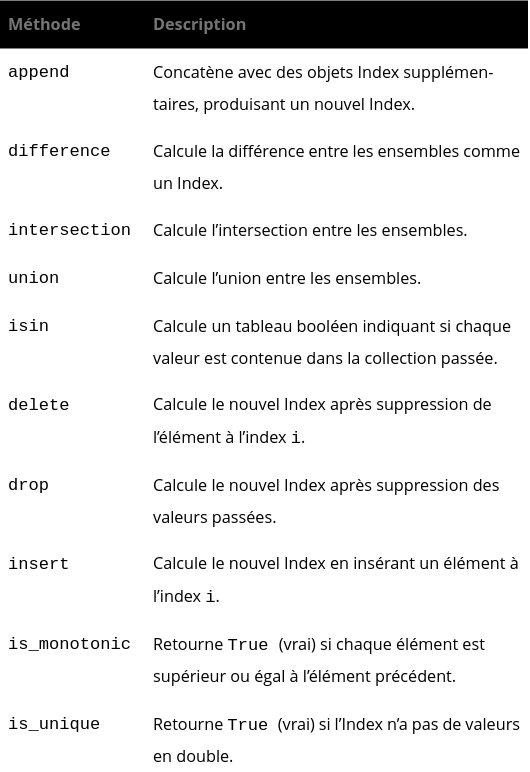

# Réindexation  
  
Une méthode importante pour les objets pandas est reindex, qui consiste à créer un nouvel objet dont les données se conforment à un nouvel index. Prenons un exemple :

In [45]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

L’appel à reindex sur cette série réorganise les données en fonction du nouvel index, en introduisant des valeurs manquantes si aucune valeur d’index n’était déjà présente :

In [46]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

Pour les données ordonnées, comme les séries chronologiques, il peut être souhaitable de faire une certaine interpolation ou de remplir des valeurs lors de la réindexation. L’option method nous permet de le faire, en spécifiant une méthode telle que ffill, qui préremplit les valeurs :

In [ ]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

In [ ]:
obj3.reindex(range(6), method='ffill')

Avec un DataFrame, reindex peut modifier soit l’index (ligne), soit les colonnes, ou les deux. Si seule une séquence est passée, elle réindexe les lignes du résultat :

In [47]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [48]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


Les colonnes peuvent être réindexées avec le mot clé columns :

In [49]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### Supprimer des entrées d’un axe   
Il est facile de supprimer une ou plusieurs entrées d’un axe si vous disposez déjà d’un tableau d’index ou d’une liste sans ces entrées. Cela peut nécessiter un peu de manipulation de données et de logique ensembliste ; la méthode drop peut renvoyer un nouvel objet avec la ou les valeurs indiquées supprimées d’un axe :

In [50]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [52]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [54]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

Avec un DataFrame, les valeurs d’index peuvent être supprimées de l’un ou de l’autre axe. Pour illustrer ceci, commençons par créer un exemple de DataFrame :

In [55]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


L’appel à drop avec une séquence d’étiquettes supprimera les valeurs depuis les étiquettes des lignes (axe 0) :

In [56]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Vous pouvez supprimer des valeurs à partir des colonnes en passant l’un des arguments axis=1 ou axis='columns' :

In [57]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [58]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


De nombreuses fonctions, comme drop, qui modifient la taille ou la forme d’un élément Series ou DataFrame, peuvent manipuler un objet en place sans retourner un nouvel objet :

In [59]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

Faites attention à l’emploi de inplace, car il détruit toutes les données qui sont supprimées.

# Indexation, sélection et filtrage  
L’indexation Series (obj[...]) fonctionne de manière analogue à l’indexation des tableaux NumPy, sauf que vous pouvez utiliser les valeurs d’index des objets Series au lieu des seuls entiers. En voici quelques exemples :

In [60]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [61]:
obj['b']

1.0

In [62]:
obj[1]

1.0

In [62]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [63]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [64]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [65]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

Le tranchage avec étiquettes se comporte différemment du tranchage normal de Python, en ce sens que la borne de fin est inclusive, comme dans :

In [65]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

Effectuer une affectation à l’aide de ces méthodes modifie la section correspondante de l’objet Series :

In [66]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

L’indexation dans un DataFrame permet de récupérer une ou plusieurs colonnes avec une seule valeur ou séquence :

In [69]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [70]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [71]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Une indexation de ce type comporte quelques cas particuliers : tout d’abord, le tranchage ou sélection des données à l’aide d’un tableau booléen :

In [72]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [74]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [72]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


La syntaxe de sélection des lignes data[ : 2] est fournie à titre de commodité. Le fait de passer un élément unique ou une liste à l’opérateur [] sélectionne des colonnes.

Un autre cas d’utilisation est l’indexation avec un DataFrame booléen, comme celui produit par une comparaison scalaire :

In [73]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [74]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Dans ce cas particulier, la syntaxe de DataFrame ressemble davantage à celle d’un tableau NumPy bidimensionnel.

# Sélection avec loc et iloc  
Pour l’indexation par étiquettes des DataFrame sur les lignes, les opérateurs d’indexation spéciaux loc et iloc permettent de sélectionner un sous-ensemble de lignes et de colonnes d’un DataFrame avec une notation de type NumPy en utilisant soit des étiquettes d’axes (loc), soit des entiers (iloc).

À titre d’exemple préliminaire, sélectionnons une seule ligne et plusieurs colonnes par étiquette :

In [75]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

Effectuons ensuite quelques sélections similaires avec des entiers en utilisant iloc :

In [76]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [77]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [78]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


Les deux fonctions d’indexation travaillent avec des tranches en plus d’étiquettes individuelles ou de listes d’étiquettes :

In [79]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [76]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


# Arithmétique et alignement des données  
  
Une caractéristique importante de pandas pour certaines applications est le comportement des opérations arithmétiques entre des objets ayant des index différents. Lorsque vous additionnez des objets, si des paires d’index quelconques ne sont pas les mêmes, l’index respectif dans le résultat sera l’union des paires d’index. Pour les utilisateurs qui ont déjà une certaine expérience des bases de données, cela est similaire à une jointure extérieure automatique sur les étiquettes des index. Voyons un exemple :

In [77]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [78]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

En additionnant ces deux éléments, on obtient ceci :

In [79]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

L’alignement interne des données introduit des valeurs manquantes dans les emplacements des étiquettes qui ne se chevauchent pas. Les valeurs manquantes se propageront ensuite dans d’autres calculs arithmétiques.  
  
  
Dans le cas d’un DataFrame, l’alignement est effectué à la fois sur les lignes et les colonnes :

In [80]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [81]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


L’addition de ces éléments donne un DataFrame dont l’index et les colonnes sont les unions de ceux de chaque DataFrame :

In [82]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


Du fait que les colonnes 'c' et 'e' ne se trouvent pas dans les deux objets DataFrame, elles apparaissent comme étant manquantes dans le résultat. Il en va de même pour les lignes dont les étiquettes ne sont pas communes aux deux objets.   
  
Si vous ajoutez des objets DataFrame sans étiquette commune de colonne ou de ligne, le résultat ne contiendra que des valeurs non définies :

In [83]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1

,A
0,1
1,2


In [84]:
df2

,B
0,3
1,4


In [85]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


# Méthodes arithmétiques avec valeurs de remplissage  
  
Lors d’opérations arithmétiques entre des objets indexés différemment, vous pourriez vouloir effectuer un remplissage avec une valeur spéciale, comme 0, lorsqu’une étiquette d’axe est trouvée dans un objet mais pas dans l’autre. Par exemple :

In [86]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [87]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


L’addition de ces données donne des valeurs NA dans les endroits qui ne se chevauchent pas :

In [88]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


En appliquant la méthode add sur df1, je passe df2 et un argument à fill_value :

In [89]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


lorsque vous réindexez une série ou une DataFrame, vous pouvez également spécifier une valeur de remplissage différente :

In [90]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


# Opérations entre DataFrame et Series  
Comme pour les tableaux NumPy de différentes dimensions, l’arithmétique entre DataFrame et Series est définie dans pandas. Tout d’abord, à titre d’exemple motivant, considérons la différence entre un tableau bidimensionnel et une de ses lignes :

In [96]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [97]:
arr[0]

array([0., 1., 2., 3.])

In [98]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

Lorsque nous soustrayons arr[0] de arr, l’opération est effectuée une fois pour chaque ligne.

In [99]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [100]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

Par défaut, l’arithmétique entre DataFrame et Series correspond à l’index de l’objet Series sur les colonnes du DataFrame, en diffusant les lignes :

In [101]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


Si une valeur d’index n’est pas trouvée dans les colonnes du DataFrame ou dans l’index de l’objet Series, les objets seront réindexés pour former l’union :

In [102]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


Si vous voulez plutôt diffuser sur les colonnes, en faisant correspondre les lignes, vous devez utiliser une des méthodes arithmétiques indiquées précédemment. Par exemple :

In [103]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [103]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [105]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


Le numéro de l’axe que vous passez est l’axe à faire correspondre. Dans ce cas, nous voulons que la correspondance se fasse sur l’index de ligne du DataFrame (axis='index' ou axis=0) avec une diffusion à travers.

# Application de fonctions et mappage  
  
Les ufuncs de NumPy (méthodes de tableaux élément par élément) fonctionnent également avec les objets pandas :

In [106]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [107]:
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


Une autre opération fréquente consiste à appliquer une fonction sur des tableaux unidimensionnels à chaque colonne ou ligne. C’est exactement ce que réalise la méthode apply du DataFrame :

In [108]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.802165
d    1.684034
e    2.689627
dtype: float64

Ici, la fonction f, qui calcule la différence entre le maximum et le minimum d’une série, est invoquée une fois sur chaque colonne dans frame. Le résultat est une série ayant les colonnes de frame comme index.

Si vous passez axis='columns' à apply, la fonction sera invoquée à la place une fois par ligne :

In [109]:
frame.apply(f, axis='columns')

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

La plupart des statistiques de tableau les plus courantes (comme la somme et la moyenne) sont des méthodes de DataFrame, et il n’est donc pas nécessaire d’utiliser apply.  
  
La fonction passée à apply n’a pas besoin de renvoyer une valeur scalaire. Elle peut aussi renvoyer un objet Series avec des valeurs multiples :

In [133]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


Des fonctions Python travaillant élément par élément peuvent également être utilisées. Supposons que vous vouliez calculer une chaîne formatée à partir de chaque valeur en virgule flottante de frame. Vous pouvez le faire avec applymap :

In [109]:
format = lambda x: f'{x:.2f}'
frame.applymap(format)

,b,d,e
Utah,-0.20,0.48,-0.52
Ohio,-0.56,1.97,1.39
Texas,0.09,0.28,0.77
Oregon,1.25,1.01,-1.30


Le nom applymap vient du fait que Series dispose d’une méthode map pour appliquer une fonction élément par élément :

In [110]:
frame['e'].map(format)

Utah      -0.52
Ohio       1.39
Texas      0.77
Oregon    -1.30
Name: e, dtype: object

# Tri et classement  
  
Le tri d’un jeu de données en fonction de certains critères est une autre opération native importante. Pour effectuer un tri lexicographique par index de ligne ou de colonne, utilisez la méthode sort_index, qui renvoie un nouvel objet trié :

In [111]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

Avec un DataFrame, vous pouvez trier par index sur l’un ou l’autre des axes :

In [112]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [113]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


Par défaut, les données sont triées par ordre croissant, mais elles peuvent également être triées par ordre décroissant :

In [114]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


Pour trier une série en fonction de ses valeurs, utilisez sa méthode sort_values :

In [115]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

Les valeurs manquantes sont triées par défaut jusqu’à la fin de l’objet Series :    

In [116]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

Lorsque vous triez un DataFrame, vous pouvez utiliser les données d’une ou de plusieurs colonnes comme clés de tri. Pour cela, passez un ou plusieurs noms de colonnes à l’option by de sort_values :

In [117]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [118]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


Pour trier sur plusieurs colonnes, passez une liste de noms :

In [119]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


Le classement attribue des rangs de un à plusieurs points de données valides dans un tableau. Les méthodes rank pour Series et DataFrame sont l’endroit à consulter. Par défaut, un classement attribue à chaque groupe le rang moyen :

In [120]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

Les rangs peuvent également être attribués en fonction de l’ordre dans lequel ils sont observés dans les données :

In [146]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

Ici, au lieu d’utiliser le rang moyen 6,5 pour les entrées 0 et 2, leur valeur a plutôt été fixée à 6 et 7, car l’étiquette 0 précède l’étiquette 2 dans les données.  
  
Vous pouvez aussi effectuer un classement par ordre décroissant :

In [147]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

Un DataFrame peut calculer un classement portant sur les lignes ou les colonnes :

In [148]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [149]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


*Methodes de departage pour le classement*

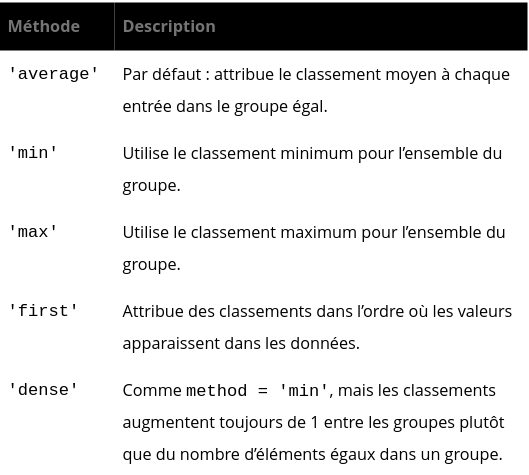

# Index d’axes avec des étiquettes dupliquées   
  
Jusqu’à présent, tous les exemples que nous avons étudiés avaient des étiquettes d’axes (valeurs d’index) uniques. Bien que de nombreuses fonctions de pandas (comme reindex) exigent que les étiquettes soient uniques, ce n’est pas obligatoire. Considérons une petite série avec des index dupliqués :

In [150]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

La propriété is_unique de l’index peut vous indiquer si ses étiquettes sont uniques ou non :

In [151]:
obj.index.is_unique

False

La sélection des données est l’une des principales actions qui diffère avec les doublons. L’indexation d’une étiquette avec des entrées multiples renvoie une série, tandis que des entrées simples renvoient une valeur scalaire :

In [152]:
obj['a']

a    0
a    1
dtype: int64

In [153]:
obj['c']

4

Cela peut rendre votre code plus compliqué, car le type de sortie de l’indexation peut varier selon qu’une étiquette est répétée ou non.

La même logique s’applique à l’indexation des lignes dans un DataFrame :

In [154]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.274992,0.228913,1.352917
a,0.886429,-2.001637,-0.371843
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


In [155]:
df.loc['b']

,0,1,2
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


# Synthèse et statistiques descriptives  
Les objets pandas sont équipés d’un ensemble de méthodes mathématiques et statistiques courantes. La plupart d’entre elles entrent dans la catégorie des statistiques de  réduction ou sommaires, des méthodes qui extraient une seule valeur (comme la somme ou la moyenne) d’une série ou une série de valeurs des lignes ou des colonnes d’un DataFrame. Par rapport aux méthodes similaires des tableaux NumPy, elles offrent une gestion intégrée des données manquantes. Considérons un petit DataFrame :

In [156]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


L’appel à la méthode sum du DataFrame renvoie un objet Series contenant des sommes de colonnes :

In [157]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Spécifier axis='columns' ou axis=1 fait calculer les sommes entre les colonnes :

In [158]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

Les valeurs NA sont exclues, sauf si la totalité de la tranche (ligne ou colonne dans ce cas) est également NA. Ceci peut être désactivé avec l’option skipna :

In [159]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

Certaines méthodes, comme idxmin et idxmax, renvoient des statistiques indirectes comme la valeur d’index où les valeurs minimales ou maximales sont atteintes :

In [160]:
df.idxmax()

one    b
two    d
dtype: object

D’autres méthodes sont des accumulations :

In [161]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


Un autre type de méthode n’est ni une réduction ni une accumulation. describe en constitue un exemple, dans lequel plusieurs statistiques sommaires sont produites en un seul coup :

In [162]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


Sur des données non numériques, describe produit des statistiques sommaires alternatives :

In [163]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

# Corrélation et covariance  

Certaines statistiques sommaires, comme la corrélation et la covariance, sont calculées à partir de paires d’arguments. Considérons quelques DataFrame de cours d’actions et de volumes de transactions obtenus de Yahoo! Finance

In [167]:
price = pd.read_pickle('examples/yahoo_price.pkl')
volume = pd.read_pickle('examples/yahoo_volume.pkl')

Je calcule maintenant les pourcentages de variation des cotations

In [169]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


La méthode `corr` de Series calcule le coefficient de corrélation de deux Series (valeurs non NA). De même, la méthode `cov` calcule la covariance :

In [170]:
returns.MSFT.corr(returns.IBM)

0.4997636114415114

In [172]:
returns.MSFT.cov(returns.IBM)

8.870655479703546e-05

Les méthodes `corr` et `cov` de DataFrame, d’autre part, renvoient une matrice de corrélation ou de covariance complète en tant que DataFrame, soit respectivement :

In [173]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


In [174]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


En utilisant la méthode corrwith de DataFrame, vous pouvez calculer des corrélations par paires entre les colonnes ou les lignes d’un DataFrame avec une autre série ou DataFrame. Passer un objet Series renvoie une série avec la valeur de corrélation calculée pour chaque colonne :

In [175]:
returns.corrwith(returns.IBM)

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

Passer un DataFrame calcule les corrélations des noms de colonnes correspondantes. Ici, je calcule les corrélations des variations en pourcentage du volume :

In [176]:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

Passer axis='columns' procède ligne par ligne. Dans tous les cas, les points de données sont alignés par étiquette avant que la corrélation ne soit calculée.

# Valeurs uniques, dénombrement de valeurs et appartenance  
  
Une autre catégorie de méthodes connexes permet d’extraire des informations sur les valeurs contenues dans une série unidimensionnelle. Pour illustrer ces méthodes, prenons cet exemple :

In [177]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

La première fonction est unique. Elle vous donne un tableau des valeurs uniques dans l’objet Series :

In [178]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

Les valeurs uniques ne sont pas nécessairement renvoyées dans un ordre trié, mais ce classement peut être effectué ultérieurement si besoin (uniques.sort()). De même, value_counts calcule une série contenant des fréquences de valeurs :

In [179]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

L’objet Series est trié dans l’ordre décroissant des valeurs pour plus de commodité. value_counts est également disponible comme méthode pandas de haut niveau pouvant être utilisée avec n’importe quel tableau ou séquence :

In [180]:
pd.value_counts(obj.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

`isin` effectue une vérification de l’appartenance à un ensemble vectorisé et peut être utile pour filtrer un jeu de données jusqu’à un sous-ensemble de valeurs dans un objet Series ou une colonne dans un DataFrame :

In [181]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [182]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [183]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object